# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Tiara Fitra Ramadhani Siregar
- **Email:** tfitra77.tf@gmail.com
- **ID Dicoding:** tiarafrs2002

## Menentukan Pertanyaan Bisnis

- Pada musim dan cuaca apa jumlah penyewaan sepeda tertinggi dan terendah?
- Kapan waktu puncak penggunaan sepeda dalam sehari? 
- Bagaimana tren pertumbuhan pengguna dari tahun 2011 ke 2012?

## Import Semua Packages/Library yang Digunakan

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada submisi Belajar Analisis Data dengan Python, saya menggunakan dataset Bike Sharing. Dataset ini terdiri dari 2 file, yaitu day.csv dan hour.csv

In [85]:
day_df = pd.read_csv('./data/day.csv')
hour_df = pd.read_csv('./data/hour.csv')

In [86]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [87]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
Dataset ini berisi jumlah penyewaan sepeda per jam dan per hari antara tahun 2011 dan 2012 dalam sistem Capital Bike Share, serta dilengkapi dengan informasi cuaca dan musim. Terdapat dua file dalam dataset ini: day.csv (data per hari) dan hour.csv (data per jam). Semua atribut terdapat di kedua file, kecuali atribut hr yang hanya terdapat di hour.csv

**Deskripsi Atribut:**
1. instant: Indeks data (urutan rekaman).
2. dteday: Tanggal pencatatan.
3. season: Musim dalam setahun:
    - 1: Musim semi (Spring)
    - 2: Musim panas (Summer)
    - 3: Musim gugur (Fall)
    - 4: Musim dingin (Winter)
4. yr: Tahun pencatatan:
    - 0: Tahun 2011
    - 1: Tahun 2012
5. mnth: Bulan dalam setahun (1–12).
6. hr: Jam dalam sehari (0–23) (hanya ada di hour.csv).
7. holiday: Indikator apakah hari tersebut adalah hari libur:
    - 1: Hari libur
    - 0: Bukan hari libur
8. weekday: Hari dalam seminggu (0–6, dengan 0 sebagai Minggu).
9. workingday: Indikator apakah hari tersebut adalah hari kerja:
    - 1: Hari kerja (bukan akhir pekan atau hari libur)
    - 0: Akhir pekan atau hari libur
10. weathersit: Kondisi cuaca saat pencatatan:
    - 1: Cerah, sedikit berawan, atau berawan sebagian
    - 2: Berkabut dengan awan, mendung, atau sedikit berawan
    - 3: Hujan ringan, salju ringan, atau badai petir dengan awan tersebar
    - 4: Hujan lebat, es, badai petir, atau salju tebal
11. temp: Suhu yang telah dinormalisasi (dalam Celsius), dihitung berdasarkan rumus: (t-t_min)/(t_max-t_min), dengan t_min = -8°C dan t_max = 39°C (hanya untuk data per jam).
12. atemp: Suhu yang dirasakan (dalam Celsius), dinormalisasi dengan rumus serupa: (t-t_min)/(t_max-t_min), dengan t_min = -16°C dan t_max = 50°C (hanya untuk data per jam).
13. hum: Tingkat kelembapan udara yang telah dinormalisasi (dibagi 100).
14. windspeed: Kecepatan angin yang telah dinormalisasi (dibagi 67).
15. casual: Jumlah pengguna sepeda yang tidak terdaftar (pengguna umum).
16. registered: Jumlah pengguna sepeda yang terdaftar sebagai anggota.
17. cnt: Jumlah total penyewaan sepeda (baik pengguna umum maupun terdaftar).



### Assessing Data

##### Menilai Data day_df

In [88]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**

Berdasarkan informasi dari day_df, jumlah data non-null di setiap kolom adalah sama yaitu 731 data. Sehingga dapat diketahui bahwa tidak ada missing values di setiap kolom. Namun, kolom dteday seharusnya bertipe data datetime karena merupakan atribut tanggal pencatatan.

In [89]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**

Tidak terdapat nilai null dalam setiap kolom pada data day_df

In [90]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**

Tidak terdapat data duplikasi pada data day_df

In [91]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


**Insight:**

Berdasarkan hasil ringkasan parameter statistik di atas, tidak terdapat keanehan pada nilai statistik manapun.

##### Menilai Data hour_df

In [92]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**

Berdasarkan informasi dari data hour_df, jumlah data non-null di setiap kolom adalah sama yaitu 17379 data. Sehingga dapat diketahui bahwa tidak ada missing values di setiap kolom. Namun, kolom dteday seharusnya bertipe data datetime karena merupakan atribut tanggal pencatatan.

In [93]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**

Tidak terdapat nilai null dalam setiap kolom pada data hour_df

In [94]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**

Tidak terdapat data duplikasi pada data hour_df

In [95]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**

Berdasarkan hasil ringkasan parameter statistik di atas, tidak terdapat keanehan pada nilai statistik manapun.

### Cleaning Data

##### Membersihkan data day_df

Mengubah tipe data kolom dteday dari object menjadi datetime

In [96]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])


In [97]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**

Berdasarkan informasi di atas, tipe data kolom dteday telah berhasil diubah menjadi datetime

##### Membersihkan data hour_df


Mengubah tipe data kolom dteday dari object menjadi date time

In [98]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [99]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**

Berdasarkan informasi di atas, tipe data kolom dteday telah berhasil diubah menjadi datetime

**Kirim Data yang Sudah dibersihkan ke Dashboard**

In [116]:
hour_df.to_csv('./dashboard/hour_cleaned.csv', index=False)
day_df.to_csv('./dashboard/day_cleaned.csv', index=False)

## Exploratory Data Analysis (EDA)

### Explore day_df

**Menampilkan rangkuman parameter statistik**

In [100]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
- Rentang tanggal penyewaan adalah 1 Januari 2011 hingga 31 Desember 2012
- Jumlah total penyewaan sepeda terendah dalam 1 hari adalah 22
- Jumlah total penyewaan sepeda tertinggi dalam 1 hari adalah 8714
- Jumlah total penyewaan sepeda terendah oleh pengguna casual adalah 2
- Jumlah penyewaan sepeda tertinggi oleh pengguna casual adalah 3410
- Jumlah penyewaan sepeda terendah oleh pengguna registered adalah 20
- Jumlah penyewaan sepeda tertinggi oleh pengguna registered  adalah 6946 


**Mengelompokkan data penyewa per tahun, kemudian menghitung jumlah minimum, maksimum, dan total keseluruhan**

In [101]:
day_grouped = day_df.groupby(by='yr').agg({
    'cnt': ['min', 'max', 'sum'],
})

day_grouped.rename(index={0: 2011, 1: 2012}, inplace=True)
print(day_grouped.to_string(index=True))

      cnt               
      min   max      sum
yr                      
2011  431  6043  1243103
2012   22  8714  2049576


**Insight:** 
- Total penyewaan sepeda pada tahun 2012 lebih tinggi dibandingkan tahun 2011, meningkat dari 1.243.103 menjadi 2.049.576.  
- Jumlah penyewaan harian tertinggi di tahun 2012 lebih besar dibandingkan tahun 2011, yaitu 8.714 pada 2012 dan 6.043 pada 2011.  
- Namun, jumlah penyewaan harian terendah di tahun 2012 lebih rendah dibandingkan tahun 2011, yaitu 22 pada 2012 dan 431 pada 2011.

**Mengelompokkan data total penyewa keseluruhan berdasarkan musim**

In [113]:
# Mapping untuk musim
season_map = {
    1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'
}

# Group by tahun dan musim
df_grouped_season = day_df.groupby(['yr', 'season']).agg({
    'cnt': ['sum']
}).reset_index()

# Format tabel
df_grouped_season['Tahun'] = df_grouped_season['yr'].map({0: '2011', 1: '2012'})
df_grouped_season['Musim'] = df_grouped_season['season'].map(season_map)

df_grouped_season = df_grouped_season[['Tahun', 'Musim', 'cnt']]
df_grouped_season.columns = ['Tahun', 'Musim', 'Total Penyewa']

# Tampilkan tabel
print(df_grouped_season.to_string(index=False))

Tahun  Musim  Total Penyewa
 2011   Semi         150000
 2011  Panas         347316
 2011  Gugur         419650
 2011 Dingin         326137
 2012   Semi         321348
 2012  Panas         571273
 2012  Gugur         641479
 2012 Dingin         515476


**Insight:**  
- Penyewaan tertinggi terjadi pada musim Gugur di kedua tahun, dengan jumlah 419.650 penyewa pada 2011 dan 641.479 penyewa pada 2012.  
- Penyewaan terendah terjadi pada musim Semi, yaitu 150.000 penyewa pada 2011 dan 321.348 penyewa pada 2012.  
- Secara keseluruhan, terjadi peningkatan jumlah penyewaan sepeda di semua musim pada tahun 2012 dibandingkan 2011.

**Mengelompokkan data total keseluruhan berdasarkan cuaca**

In [ ]:
# Mapping untuk cuaca
weather_map = {
    1: 'Cerah, Sedikit berawan, Sebagian berawan, Sebagian berawan',
    2: 'Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut', 
    3: 'Salju ringan, Hujan ringan + Petir + Awan terpisah, Hujan ringan + Awan terpisah',
    4: 'Hujan lebat + Butiran es + Petir + Kabut, Salju + Kabut tebal'
}

day_df['weather_name'] = day_df['weathersit'].map(weather_map)
# Group by tahun dan cuaca
df_grouped_weather = day_df.groupby(['yr', 'weathersit']).agg({
    'cnt': ['sum']
}).reset_index()

# Format tabel
df_grouped_weather['Tahun'] = df_grouped_weather['yr'].map({0: '2011', 1: '2012'})
df_grouped_weather['Cuaca'] = df_grouped_weather['weathersit'].map(weather_map)

df_grouped_weather = df_grouped_weather[['Tahun', 'Cuaca', 'cnt']]
df_grouped_weather.columns = ['Tahun', 'Cuaca', 'Total Penyewa']

# Tampilkan tabel
print(df_grouped_weather.to_string(index=False))

Tahun                                                                            Cuaca  Total Penyewa
 2011                       Cerah, Sedikit berawan, Sebagian berawan, Sebagian berawan         835067
 2011                 Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut         382924
 2011 Salju ringan, Hujan ringan + Petir + Awan terpisah, Hujan ringan + Awan terpisah          25112
 2012                       Cerah, Sedikit berawan, Sebagian berawan, Sebagian berawan        1422885
 2012                 Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut         613934
 2012 Salju ringan, Hujan ringan + Petir + Awan terpisah, Hujan ringan + Awan terpisah          12757


**Insight:**
  
- Cuaca Cerah, Sedikit berawan, Sebagian berawan, Sebagian berawan menghasilkan jumlah penyewaan tertinggi di kedua tahun. Pada 2011, total penyewa mencapai 835.067, sedangkan pada 2012 meningkat signifikan menjadi 1.422.885
- Cuaca Salju ringan, Hujan ringan + Petir + Awan terpisah, Hujan ringan + Awan terpisah memiliki jumlah penyewaan terendah. Pada 2011, total penyewa hanya 25.112, sedangkan pada 2012 bahkan lebih rendah, yaitu 12.757, menunjukkan bahwa kondisi cuaca buruk sangat memengaruhi minat penyewaan sepeda
- Tidak terdapat data penyewaan untuk cuaca Hujan lebat + Butiran es + Petir + Kabut, Salju + Kabut tebal

**Mengelompokkan data total penyewa casual, registered, dan keseluruhan berdasarkan cuaca dan musim**

In [115]:
# Mapping untuk cuaca dan musim
weather_map = {
    1: 'Cerah, Sedikit berawan, Sebagian berawan, Sebagian berawan',
    2: 'Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut', 
    3: 'Salju ringan, Hujan ringan + Petir + Awan terpisah, Hujan ringan + Awan terpisah',
    4: 'Hujan lebat + Butiran es + Petir + Kabut, Salju + Kabut tebal'
}

season_map = {
    1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'
}
day_df['season_name'] = day_df['season'].map(season_map)

# Group by tahun, musim, dan cuaca
df_grouped = day_df.groupby(['yr', 'season', 'weathersit']).agg({
    'cnt': ['sum']
}).reset_index()

# Format tabel
df_grouped['Tahun'] = df_grouped['yr'].map({0: '2011', 1: '2012'})
df_grouped['Musim'] = df_grouped['season'].map(season_map)
df_grouped['Cuaca'] = df_grouped['weathersit'].map(weather_map)

df_grouped = df_grouped[['Tahun', 'Musim', 'Cuaca', 'cnt']]
df_grouped.columns = ['Tahun', 'Musim', 'Cuaca', 'Total Penyewa']

# Tampilkan tabel
print("Tabel Penyewaan Sepeda Berdasarkan Musim dan Cuaca per Tahun:")
print(df_grouped.to_string(index=False))

Tabel Penyewaan Sepeda Berdasarkan Musim dan Cuaca per Tahun:
Tahun  Musim                                                                            Cuaca  Total Penyewa
 2011   Semi                       Cerah, Sedikit berawan, Sebagian berawan, Sebagian berawan          99535
 2011   Semi                 Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut          49336
 2011   Semi Salju ringan, Hujan ringan + Petir + Awan terpisah, Hujan ringan + Awan terpisah           1129
 2011  Panas                       Cerah, Sedikit berawan, Sebagian berawan, Sebagian berawan         220323
 2011  Panas                 Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut         124513
 2011  Panas Salju ringan, Hujan ringan + Petir + Awan terpisah, Hujan ringan + Awan terpisah           2480
 2011  Gugur                       Cerah, Sedikit berawan, Sebagian berawan, Sebagian berawan         309150
 2011  Gugur                 Kabut + Berawan, Kabut + Awan pecah, 

**Insight:**
- Pada tahun 2011, total penyewaan tertinggi terjadi pada musim gugur dengan 309.150 penyewa saat cuaca Cerah, Sedikit berawan, Sebagian berawan, Sebagian berawan.
- Pada tahun 2011, total penyewaan terendah terjadi pada musim semi saat Salju ringan, Hujan ringan + Petir + Awan terpisah, Hujan ringan + Awan terpisah, hanya 1.129 penyewa.
- Pada tahun 2012, total penyewaan tertinggi terjadi pada musim gugur dengan 490.293 penyewa saat cuaca Cerah, Sedikit berawan, Sebagian berawan, Sebagian berawan.
- Pada tahun 2012, total penyewaan terendah terjadi pada musim panas saat Salju ringan, Hujan ringan + Petir + Awan terpisah, Hujan ringan + Awan terpisah, hanya 1.027 penyewa.
- Total penyewaan tertinggi di kedua tahun terjadi pada musim gugur 2012 dengan 490.293 penyewa saat cuaca Cerah, Sedikit berawan, Sebagian berawan, Sebagian berawan.  
- Total penyewaan terendah di kedua tahun terjadi pada musim semi 2011 saat Salju ringan, Hujan ringan + Petir + Awan terpisah, Hujan ringan + Awan terpisah, hanya 1.129 penyewa.  
- Cuaca Cerah, Sedikit berawan, Sebagian berawan, Sebagian berawan selalu menghasilkan jumlah penyewa terbanyak di semua musim, sedangkan Salju ringan, Hujan ringan + Petir + Awan terpisah, Hujan ringan + Awan terpisah menyebabkan jumlah penyewa paling sedikit.  
- Peningkatan terbesar terjadi pada musim gugur dan musim panas 2012 dibandingkan tahun sebelumnya.

### Explore hour_df

**Mengelompokkan total penyewa per jam**

In [106]:
# Group by tahun, musim, dan cuaca
hour_grouped = hour_df.groupby('hr').agg({
    'cnt': ['mean'],
    'casual': ['mean'],
    'registered': ['mean'],
})

print(hour_grouped.to_string(index=True))

           cnt     casual  registered
          mean       mean        mean
hr                                   
0    53.898072  10.158402   43.739669
1    33.375691   6.504144   26.871547
2    22.869930   4.772028   18.097902
3    11.727403   2.715925    9.011478
4     6.352941   1.253945    5.098996
5    19.889819   1.411437   18.478382
6    76.044138   4.161379   71.882759
7   212.064649  11.055021  201.009629
8   359.011004  21.679505  337.331499
9   219.309491  30.891334  188.418157
10  173.668501  46.477304  127.191197
11  208.143054  59.540578  148.602476
12  253.315934  68.293956  185.021978
13  253.661180  72.308642  181.352538
14  240.949246  75.567901  165.381344
15  251.233196  74.905350  176.327846
16  311.983562  73.745205  238.238356
17  461.452055  74.273973  387.178082
18  425.510989  61.120879  364.390110
19  311.523352  48.770604  262.752747
20  226.030220  36.233516  189.796703
21  172.314560  28.255495  144.059066
22  131.335165  22.252747  109.082418
23   87.8310

**Insight:**

- Jumlah peminjaman tertinggi secara keseluruhan terjadi pada jam 17:00 dengan rata-rata 461,45 peminjaman.
- Sementara jumlah terendah terjadi pada jam 4:00 dengan rata-rata hanya 6,35 peminjaman. 
- Peminjaman oleh pengguna casual mencapai puncaknya pada jam 14:00 dengan rata-rata 75,57 peminjaman.
- Sedangkan jumlah terendah terjadi pada jam 4:00 dengan rata-rata hanya 1,25 peminjaman.
- Pengguna terdaftar memiliki jumlah peminjaman tertinggi pada jam 17:00 dengan rata-rata 387,18.
- Sedangkan jumlah terendah tercatat pada jam 3:00 dengan rata-rata 9,01 peminjaman. 


## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim dan cuaca apa jumlah penyewaan sepeda tertinggi dan terendah?

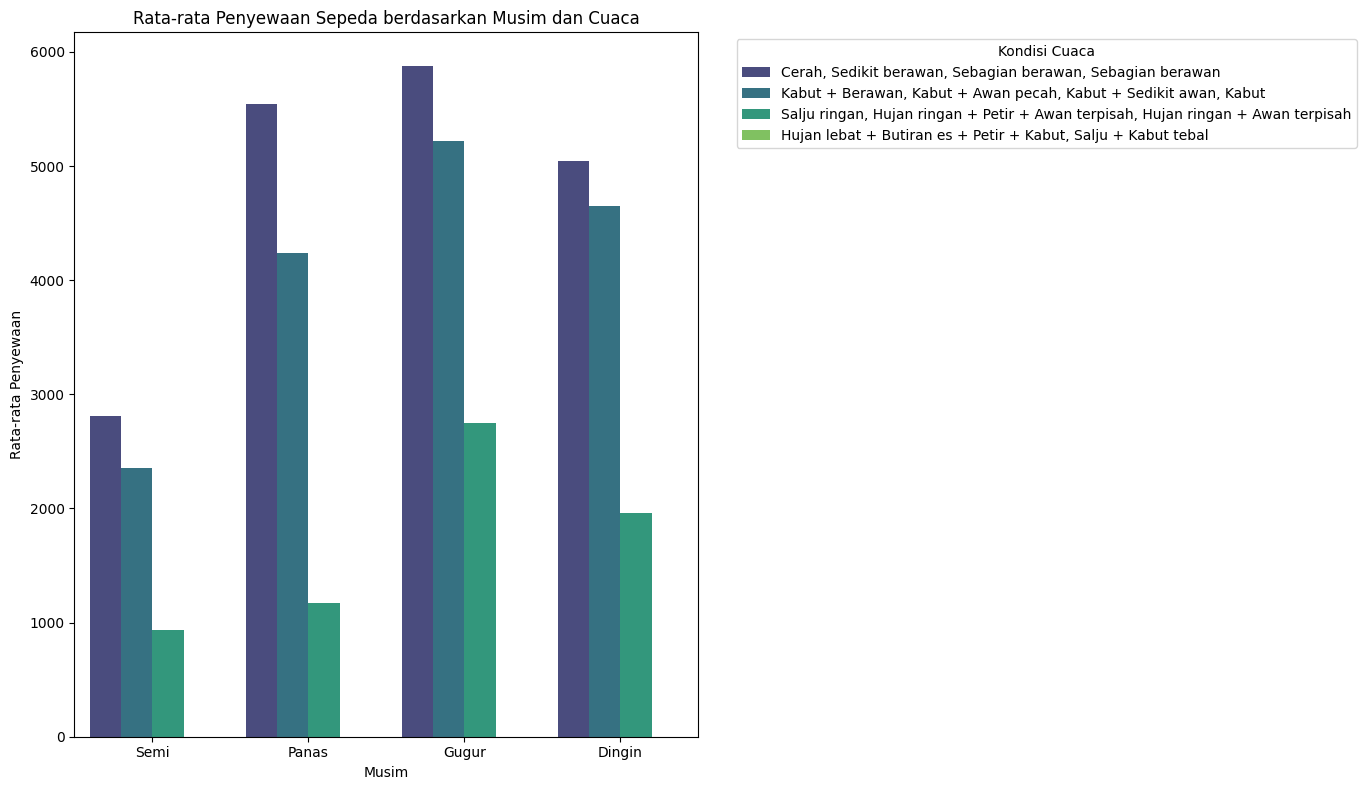

In [107]:
#Mapping nilai untuk label yang lebih jelas
season_map = {1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'}
weather_map = {
    1: 'Cerah, Sedikit berawan, Sebagian berawan, Sebagian berawan',
    2: 'Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut', 
    3: 'Salju ringan, Hujan ringan + Petir + Awan terpisah, Hujan ringan + Awan terpisah',
    4: 'Hujan lebat + Butiran es + Petir + Kabut, Salju + Kabut tebal'
}
day_df['season_name'] = day_df['season'].map(season_map)
day_df['weather_name'] = day_df['weathersit'].map(weather_map)

# Hitung rata-rata penyewaan per kombinasi musim-cuaca
season_weather_avg = day_df.groupby(['season_name', 'weather_name'])['cnt'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(14, 8))
sns.barplot(x='season_name', y='cnt', hue='weather_name', data=season_weather_avg,
            order=['Semi', 'Panas', 'Gugur', 'Dingin'],
            hue_order=['Cerah, Sedikit berawan, Sebagian berawan, Sebagian berawan'
    ,'Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut'
    ,'Salju ringan, Hujan ringan + Petir + Awan terpisah, Hujan ringan + Awan terpisah'
    ,'Hujan lebat + Butiran es + Petir + Kabut, Salju + Kabut tebal'],
            palette='viridis')

plt.title('Rata-rata Penyewaan Sepeda berdasarkan Musim dan Cuaca')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan')
plt.legend(title='Kondisi Cuaca', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Insight:**
- Rata-rata jumlah penyewaan sepeda tertinggi terjadi pada musim panas dengan kondisi cuaca Cerah, Sedikit berawan, Sebagian berawan, Sebagian berawan.
- Rata-rata jumlah penyewaan sepeda terendah terjadi pada musim semi dengan kondisi Salju ringan, Hujan ringan + Petir + Awan terpisah, Hujan ringan + Awan terpisah.
- Tidak ada data penyewaan di kondisi cuaca Hujan lebat + Butiran es + Petir + Kabut, Salju + Kabut tebal.

### Pertanyaan 2: Kapan waktu puncak penyewaan sepeda dalam sehari? 

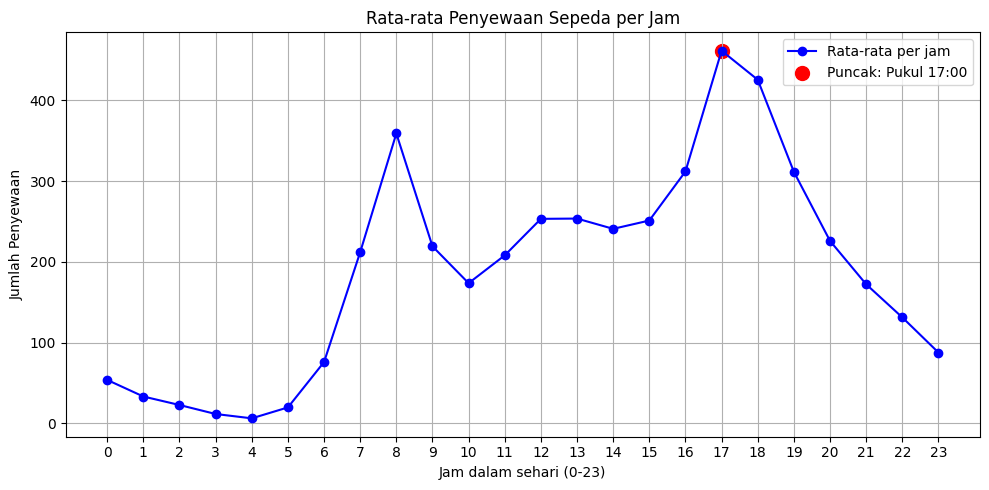

In [108]:
# Muat data dan hitung rata-rata per jam
hourly_avg = hour_df.groupby('hr')['cnt'].mean().reset_index()

# Cari jam dengan nilai penyewaan tertinggi
peak_hour = hourly_avg.loc[hourly_avg['cnt'].idxmax()]

# Buat plotting
plt.figure(figsize=(10, 5))

# Plot semua jam
plt.plot(hourly_avg['hr'], hourly_avg['cnt'], 
         marker='o', color='blue', label='Rata-rata per jam')

# Highlight peak hour
plt.scatter(peak_hour['hr'], peak_hour['cnt'], 
            color='red', s=100, label=f'Puncak: Pukul {int(peak_hour["hr"])}:00')

# Tambahkan label dan legend
plt.title('Rata-rata Penyewaan Sepeda per Jam')
plt.xlabel('Jam dalam sehari (0-23)')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Insight:**
- Rata-rata puncak penyewaan sepeda dalam sehari terjadi pada pukul 17:00

### Pertanyaan 3: Bagaimana tren pertumbuhan pengguna dari tahun 2011 ke 2012?

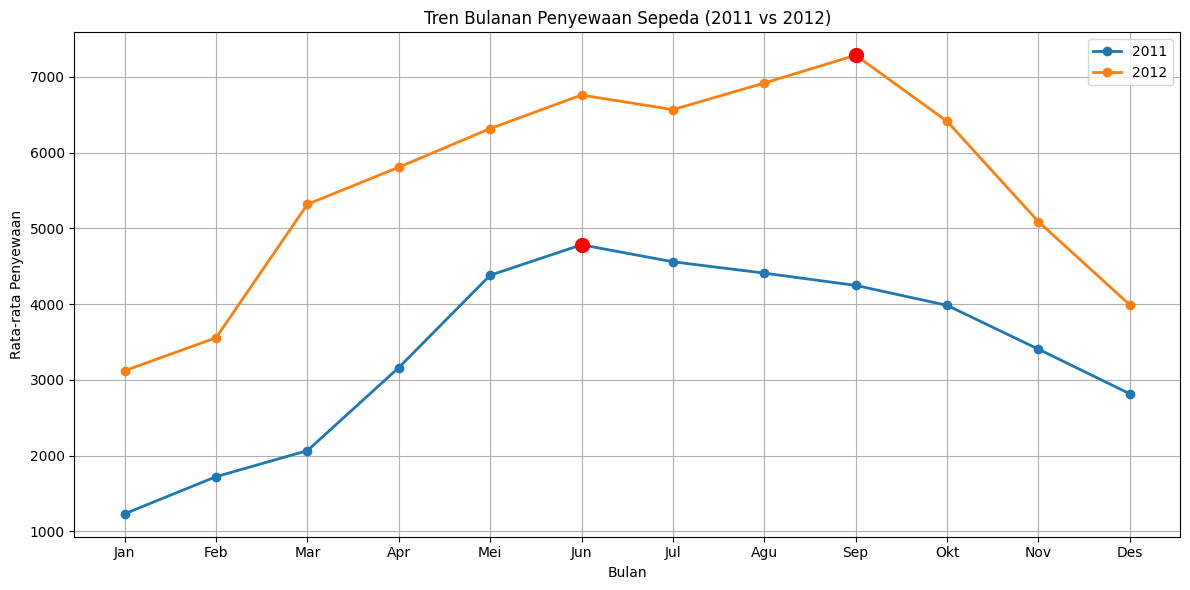

In [109]:
# Mapping tahun
day_df['year'] = day_df['yr'].map({0: '2011', 1: '2012'})

# Hitung rata-rata penyewaan per bulan
monthly_avg = day_df.groupby(['year', 'mnth'])['cnt'].mean().reset_index()

# Buat plotting
plt.figure(figsize=(12, 6))

# Plot setiap tahun dan tandai peak-nya
for year in ['2011', '2012']:
    year_data = monthly_avg[monthly_avg['year'] == year]
    
    # Plot garis utama
    plt.plot(year_data['mnth'], year_data['cnt'], 
             marker='o', label=year, linewidth=2)
    
    # Temukan dan tandai peak
    peak_month = year_data.loc[year_data['cnt'].idxmax()]
    plt.scatter(peak_month['mnth'], peak_month['cnt'], 
                color='red', s=100, zorder=5)

# Tambahkan judul dan legend
plt.title('Tren Bulanan Penyewaan Sepeda (2011 vs 2012)')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 
                         'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Insight:**
- Berdasarkan grafik yang ditampilkan, tren pertumbuhan pengguna dari tahun 2011 ke 2012 menunjukkan peningkatan yang signifikan. 
- Sepanjang tahun 2012, rata-rata jumlah penyewaan sepeda secara konsisten lebih tinggi dibandingkan tahun 2011
- Pada bulan Maret, terjadi lonjakan yang cukup besar dalam jumlah penyewaan sepeda untuk tahun 2012 dibandingkan tahun sebelumnya
- Tahun 2012 mencapai puncak penyewaan di bulan September, sementara puncak penyewaan di tahun 2011 terjadi di bulan Juni
- Kedua tahun menunjukkan pola yang serupa yaitu peningkatan di awal tahun, mencapai puncak di pertengahan tahun, dan kemudian menurun di akhir tahun.
- Angka penyewaan di tahun 2012 secara keseluruhan lebih tinggi.

## Conclusion

- Kesimpulan pertanyaan 1: Pada musim dan cuaca apa jumlah penyewaan sepeda tertinggi dan terendah?

    Rata-rata jumlah penyewaan sepeda tertinggi terjadi pada musim panas dengan kondisi cuaca Cerah, Sedikit berawan, Sebagian berawan, Sebagian berawan.
    Rata-rata jumlah penyewaan sepeda terendah terjadi pada musim semi dengan kondisi Salju ringan, Hujan ringan + Petir + Awan terpisah, Hujan ringan + Awan terpisah.
    Tidak ada data penyewaan di kondisi cuaca Hujan lebat + Butiran es + Petir + Kabut, Salju + Kabut tebal.


- Kesimpulan pertanyaan 2: Kapan waktu puncak penyewaan sepeda dalam sehari? 

    Rata-rata puncak penyewaan sepeda dalam sehari terjadi pada pukul 17:00

- Kesimpulan pertanyaan 3: Bagaimana tren pertumbuhan pengguna dari tahun 2011 ke 2012?
    
    Tren pertumbuhan pengguna dari tahun 2011 ke 2012 menunjukkan peningkatan yang signifikan. Sepanjang tahun 2012, rata-rata jumlah penyewaan sepeda secara konsisten lebih tinggi dibandingkan tahun 2011. Pada bulan Maret, terjadi lonjakan yang cukup besar dalam jumlah penyewaan sepeda untuk tahun 2012 dibandingkan tahun sebelumnya. Puncak penyewaan tahun 2012 terjadi di bulan September, sementara puncak penyewaan di tahun 2011 terjadi di bulan Juni.
    
    Kedua tahun menunjukkan pola yang serupa yaitu peningkatan di awal tahun, mencapai puncak di pertengahan tahun, dan kemudian menurun di akhir tahun. Angka penyewaan di tahun 2012 secara keseluruhan lebih tinggi.